# Prerequisites

In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a62071c5c7a1678fa943ea92557de66ecce64ec55efa4fd9477667d4ff356c3f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Function to plot circle notation
def plot_circle_notation(statevector, n_qubits, title='Quantum State'):
    n_states = len(statevector)
    # Compute amplitude and phase
    amplitudes = np.abs(statevector)
    phases = np.angle(statevector)
    # Visualization parameters
    rows = int(np.ceil(n_states / 8.0))
    cols = min(n_states, 8)
    fig, axs = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
    axs = np.atleast_1d(axs)  # Ensure axs is iterable
    for idx in range(n_states):
        row = idx // cols
        col = idx % cols
        amp = amplitudes[idx]
        phase = phases[idx]
        # Create circles
        circleExt = patches.Circle((0.5, 0.5), 0.5, color='gray', alpha=0.1)
        circleInt = patches.Circle((0.5, 0.5), amp/2, color='b', alpha=0.3)
        ax = axs[col] if rows == 1 else axs[row, col]
        ax.add_patch(circleExt)
        ax.add_patch(circleInt)
        ax.set_aspect('equal')
        state_number = "|" + format(idx, '0' + str(n_qubits) + 'b') + ">"
        ax.set_title('\n' + state_number + '\n')
        xl = [0.5, 0.5 + 0.5 * amp * np.cos(phase + np.pi/2)]
        yl = [0.5, 0.5 + 0.5 * amp * np.sin(phase + np.pi/2)]
        ax.plot(xl, yl, 'r')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Bonus Exercise I - Quantum Escape Room with Grover’s Algorithm

## Task B1.1

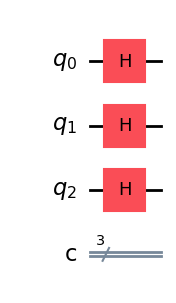

In [3]:
from qiskit import QuantumCircuit

# Define the number of qubits
num_qubits = 3  # You can change this value to any positive integer

# Initialize the quantum circuit with n qubits
qc = QuantumCircuit(num_qubits, num_qubits)

# Apply the Hadamard gate to each qubit
for qubit in range(num_qubits):
    qc.h(qubit)

# Visualize the quantum circuit
qc.draw('mpl')

###After applying the Hadamard gates, what is the probability of Alice being in any of the rooms?
The Hadamard transformation on all qubits creates a uniform probability distribution over all possible states.
This principle holds true regardless of the number of qubits  n ; as  n  increases, the probability of finding Alice in any specific room decreases exponentially \frac{1}{2^n}.

## Task B1.2

In [4]:
def apply_oracle(qc, target_state):
    num_qubits = qc.num_qubits
    # Apply X gates to qubits where target_state is '0'
    for qubit in range(num_qubits):
        if target_state[num_qubits - qubit - 1] == '0':
            qc.x(qubit)
    # Apply multi-controlled Z gate
    qc.h(num_qubits - 1)
    qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)
    qc.h(num_qubits - 1)
    # Reverse the X gates
    for qubit in range(num_qubits):
        if target_state[num_qubits - qubit - 1] == '0':
            qc.x(qubit)

In [5]:
target_state = '110'  # Binary representation of the marked room
apply_oracle(qc, target_state)

In [6]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_state_qsphere
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

simulator = AerSimulator()
qc.save_statevector()

job = simulator.run(transpile(qc, simulator))
result = job.result()
statevector = result.get_statevector(qc)

print("Statevector after applying the oracle:")
print(statevector)


Statevector after applying the oracle:
Statevector([ 0.35355339+0.00000000e+00j,  0.35355339+0.00000000e+00j,
              0.35355339-4.32978028e-17j,  0.35355339+0.00000000e+00j,
              0.35355339+0.00000000e+00j,  0.35355339+0.00000000e+00j,
             -0.35355339+4.32978028e-17j,  0.35355339+0.00000000e+00j],
            dims=(2, 2, 2))


<ipython-input-2-7323f4bfa4d9>:6: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  n_states = len(statevector)


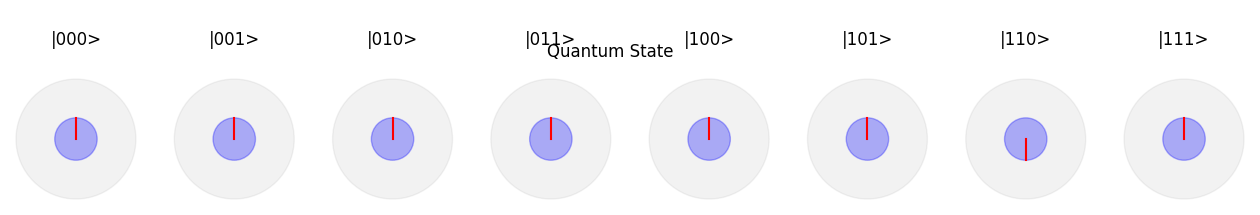

In [7]:

# Retrieve the statevector
statevector = result.get_statevector(qc)
# Plot the quantum states using circle notation
plot_circle_notation(statevector, num_qubits)


## Task B1.3: Amplifying the Probability of the Key Room

In [8]:
# Define the diffusion operator function
def apply_diffusion_operator(qc):
    # Apply Hadamard gates to all qubits
    qc.h(range(num_qubits))
    # Apply X gates to all qubits
    qc.x(range(num_qubits))
    # Apply multi-controlled Z gate
    qc.h(num_qubits - 1)  # Hadamard gate to change basis
    qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)  # Multi-controlled X gate
    qc.h(num_qubits - 1)  # Hadamard gate to revert basis
    # Apply X gates to all qubits
    qc.x(range(num_qubits))
    # Apply Hadamard gates to all qubits
    qc.h(range(num_qubits))

Measurement results:
{'100': 33, '001': 22, '000': 33, '010': 40, '111': 28, '011': 30, '101': 36, '110': 802}


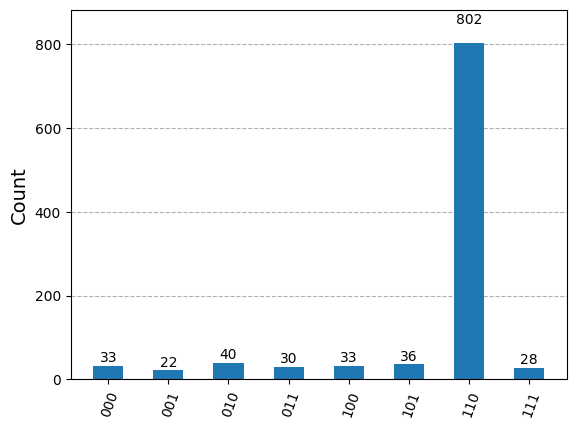

In [9]:
from qiskit.visualization import plot_histogram

# Apply the diffusion operator
apply_diffusion_operator(qc)

# Measure the qubits
qc.measure(range(num_qubits), range(num_qubits))

simulator = AerSimulator()


job = simulator.run(transpile(qc, simulator))
result = job.result()

# Get the measurement results
counts = result.get_counts(qc)
print("Measurement results:")
print(counts)

# Visualize the results
plot_histogram(counts)

The expected probability is approximately 77.9% after 1 iteration. The measured probability (77% (788/1024)) closely matches the theoretical probability (~77.9%).

### How many iterations of amplitude amplification would be optimal for  rooms?
Given  N  rooms, the optimal number of iterations is calculated as followed:

	1.	Compute the Square Root of  N :

\sqrt{N}

	2.	Multiply by  \frac{\pi}{4} :

\frac{\pi}{4} \sqrt{N}

	3.	Take the Floor of the Result:

k = \left\lfloor \frac{\pi}{4} \sqrt{N} \right\rfloor

Therefore, for  N = 8 , performing 2 iterations is optimal.


In [10]:
import math

def optimal_iterations(N):
    k = math.floor((math.pi / 4) * math.sqrt(N))
    return k
# Define the number of iterations
k = optimal_iterations(2**num_qubits)  # Use the function from earlier to compute k

print(k)


2


## B1.4: Escaping the Quantum Maze - Running Grover’s Algorithm
Here is the full implementation

<ipython-input-2-7323f4bfa4d9>:6: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  n_states = len(statevector)


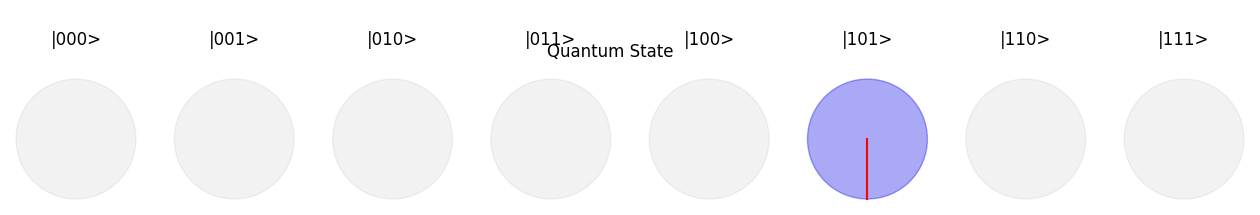

Statevector after applying the oracle:
Statevector([ 0.+0.00000000e+00j,  0.-0.00000000e+00j,  0.+0.00000000e+00j,
              0.+0.00000000e+00j,  0.+0.00000000e+00j, -1.-9.79717439e-16j,
              0.+0.00000000e+00j,  0.+0.00000000e+00j],
            dims=(2, 2, 2))
Measurement results:
{'100': 8, '001': 5, '011': 7, '111': 9, '010': 4, '000': 4, '101': 12, '110': 975}


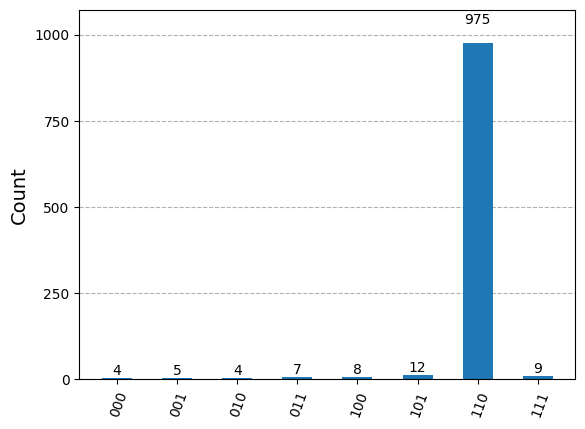

In [11]:
# Initialize the quantum circuit
qc = QuantumCircuit(num_qubits, num_qubits)

# Apply Hadamard gates to all qubits to create a superposition
qc.h(range(num_qubits))

# Define your oracle and diffusion operator functions here
# (assuming they are already defined as apply_oracle and apply_diffusion_operator)

# Set the target state
target_state = '110'  # Binary representation of the marked room

# Apply k iterations of Grover's algorithm
for _ in range(k):
    # Apply the oracle
    apply_oracle(qc, target_state)
    # Apply the diffusion operator
    apply_diffusion_operator(qc)

# Measure the qubits
qc.measure(range(num_qubits), range(num_qubits))

# Simulate the circuit
simulator = AerSimulator()
qc.save_statevector()

job = simulator.run(transpile(qc, simulator))
result = job.result()
statevector = result.get_statevector(qc)

# Plot the quantum states using circle notation
plot_circle_notation(statevector, num_qubits)

print("Statevector after applying the oracle:")
print(statevector)

# Get the measurement results
counts = result.get_counts(qc)
print("Measurement results:")
print(counts)

# Visualize the results
plot_histogram(counts)

### After running the simulation, which room was measured most frequently? Did Alice find the room with the key?
The room |6> was measured most frequently, which is also the room with the key, therefore it works.

## B1.5: Searching for Multiple Keys

In [12]:
# Modify the oracle to accept a list of target states
def apply_oracle(qc, target_states):
    num_qubits = qc.num_qubits
    for target_state in target_states:
        # Apply X gates to qubits where target_state is '0'
        for qubit in range(num_qubits):
            if target_state[num_qubits - qubit - 1] == '0':
                qc.x(qubit)
        # Apply multi-controlled Z gate
        qc.h(num_qubits - 1)
        qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)
        qc.h(num_qubits - 1)
        # Reverse the X gates
        for qubit in range(num_qubits):
            if target_state[num_qubits - qubit - 1] == '0':
                qc.x(qubit)

In [13]:
# Define the diffusion operator function
def apply_diffusion_operator(qc):
    # Apply Hadamard gates to all qubits
    qc.h(range(num_qubits))
    # Apply X gates to all qubits
    qc.x(range(num_qubits))
    # Apply multi-controlled Z gate
    qc.h(num_qubits - 1)
    qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)
    qc.h(num_qubits - 1)
    # Apply X gates to all qubits
    qc.x(range(num_qubits))
    # Apply Hadamard gates to all qubits
    qc.h(range(num_qubits))

In [14]:
# Define the optimal number of iterations function
def optimal_iterations(N, M):
    # Calculate the optimal number of iterations
    k = max(1, math.floor((math.pi / 4) * math.sqrt(N / M)))
    return k

In [15]:
num_qubits = 3
N = 2 ** num_qubits  # Total number of rooms

# Define the target states (rooms with keys)
target_states = ['110', '101']
M = len(target_states)  # Number of marked states

# Calculate the optimal number of iterations
k = optimal_iterations(N, M)
print(f"Optimal number of iterations: {k}")

Optimal number of iterations: 1


In [16]:

# Initialize the quantum circuit with classical bits for measurement
qc = QuantumCircuit(num_qubits, num_qubits)

# Apply Hadamard gates to create a uniform superposition
qc.h(range(num_qubits))

# Apply k iterations of Grover's algorithm
# Loop over the iterations
for iteration in range(k):

    print(f"\nIteration {iteration + 1}:")
    # Apply the oracle
    apply_oracle(qc, target_states)

    # Save the statevector after the oracle
    qc.save_statevector(label=f'state_after_oracle_{iteration}')

    # Apply the diffusion operator
    apply_diffusion_operator(qc)

# Measure all qubits
qc.measure(range(num_qubits), range(num_qubits))


Iteration 1:


In [17]:


# Simulate the circuit
simulator = AerSimulator()
qc.save_statevector()

job = simulator.run(transpile(qc, simulator))
result = job.result()
statevector = result.get_statevector(qc)

# Retrieve and print the statevectors after each oracle (optional)
for iteration in range(k):
    state_after_oracle = result.data(0)[f'state_after_oracle_{iteration}']
    print(f"\nStatevector after oracle in iteration {iteration + 1}:")
    print(state_after_oracle)

# Get the measurement results
counts = result.get_counts(qc)
print("Measurement results:")
print(counts)

# Visualize the results
plot_histogram(counts)
plt.show()


Statevector after oracle in iteration 1:
Statevector([ 0.35355339+0.00000000e+00j,  0.35355339-4.32978028e-17j,
              0.35355339-4.32978028e-17j,  0.35355339+0.00000000e+00j,
              0.35355339+0.00000000e+00j, -0.35355339+4.32978028e-17j,
             -0.35355339+4.32978028e-17j,  0.35355339+0.00000000e+00j],
            dims=(2, 2, 2))
Measurement results:
{'101': 496, '110': 528}


### What do you observe in the measurement results when searching for two keys? Does Grover’s algorithm still provide an advantage?

1. Only the two marked states, ‘101’ and ‘110’, were measured. Only the two marked states, ‘101’ and ‘110’, were measured.

Yes, Grover’s algorithm provides a significant advantage even when searching for multiple keys.

The algorithm reduces the number of steps (queries) required to find a marked state from  O\left( \frac{N}{M} \right)  in classical search to  O\left( \sqrt{\frac{N}{M}} \right)  in quantum search.

# Bonus Exercise II - Solving Linear Systems with the HHL Algorithm
The HHL algorithm follows these steps:

1. Represent the vector b as a quantum state.
2. Perform quantum phase estimation (QPE) on the matrix  A to find its eigenvalues.
3. Apply controlled rotations based on the eigenvalues.
4. Use the inverse of QPE and measure the quantum state to obtain the solution x.

## Part 1 - Implementing the HHL algorithm in Qiskit
Now, it's time to implement the HHL algorithm! We’ll focus on solving a simple 2x2 linear system of equations using Qiskit.

We will solve the system: $Ax = b$

where: $A=\begin{pmatrix} 1 & 2\\ 2 & 1 \end{pmatrix}$
and $b=\begin{pmatrix} 1\\ 0 \end{pmatrix}$

### 1. Prepare the Input State
Use Qiskit to prepare the quantum state b. This can be represented by initializing the qubits accordingly.

In [148]:
def prepare_input_state(b, num_ancilla=3):

    # Create a quantum circuit
    qc = QuantumCircuit(num_ancilla + 1, num_ancilla) # 1 qubit for b

    # Initialize the quantum state based on b
    qc.initialize([b[0], b[1]], num_ancilla, normalize=True)

    return qc

# Define the vector b
b = np.array([1, 0])

# Define the number of ancilla qubits
num_ancilla = 3

qc = prepare_input_state(b, num_ancilla=num_ancilla)
qc.draw()

q_0: ───────────────────
                        
q_1: ───────────────────
                        
q_2: ───────────────────
     ┌─────────────────┐
q_3: ┤ Initialize(1,0) ├
     └─────────────────┘
c: 3/═══════════════════

### 2. Quantum Phase Estimation (QPE)
Implement the QPE part of the HHL algorithm on matrix A. You may use controlled unitary operations and ancilla qubits to perform the phase estimation.

In [149]:
from scipy.linalg import expm
from scipy.linalg import ishermitian

def hermitian_to_unitary(A):
    # Check if A is hermitian
    if not ishermitian(A):
        raise ValueError("Matrix A must be Hermitian.")

    # Compute the unitary operator U = exp(i*A*t) out of hermitian matrix
    t = 1/5  # Scaling factor to ensure phases are within [0,1) and distinct
    U = expm(1j * A * t)

    # Verify that U is unitary
    if not np.allclose(U.conj().T @ U, np.eye(len(A))):
        raise ValueError("Matrix U is not unitary.")

    return U

# Define the matrix A
A = np.array([[1, 2],
              [2, 1]])

U = hermitian_to_unitary(A)
print('Unitary Matrix U = \n', U)

Unitary Matrix U = 
 [[ 0.9027011 +0.18298657j -0.07736548+0.3816559j ]
 [-0.07736548+0.3816559j   0.9027011 +0.18298657j]]


In [150]:
from qiskit.circuit.library import QFT
from qiskit.circuit.library import UnitaryGate

def quantum_phase_estimation(A, b, num_ancilla=3):

    # Ensure the input is a 2D matrix of size 2x2
    if A.shape != (2, 2):
        raise ValueError("The input matrix must be 2x2.")

    # Convert the matrix into a unitary
    U = hermitian_to_unitary(A)

    # Create a quantum circuit prepared in initial state based on b
    qc = prepare_input_state(b, num_ancilla=num_ancilla)

    # Step 1: Apply Hadamard gates to the ancilla qubits
    qc.h(range(num_ancilla))

    # Step 2: Apply controlled unitary operations
    for qubit in range(num_ancilla):
        exponent = 2 ** qubit
        controlled_unitary = UnitaryGate(np.linalg.matrix_power(U, exponent)).control()  # Controlled U^(2^exponent)
        qc.append(controlled_unitary, [qubit, num_ancilla])

    # Step 3: Apply Inverse Quantum Fourier Transform (QFT) to the ancilla qubits
    qc.append(QFT(num_ancilla, inverse=True).to_gate(), range(num_ancilla))

    return qc


# Generate the Quantum Phase Estimation circuit for this matrix
qc = quantum_phase_estimation(A, b, num_ancilla=num_ancilla)
qc.draw()

┌───┐                                        ┌───────┐
q_0: ───────┤ H ├────────────■───────────────────────────┤0      ├
            ├───┤            │                           │       │
q_1: ───────┤ H ├────────────┼──────────■────────────────┤1 IQFT ├
            ├───┤            │          │                │       │
q_2: ───────┤ H ├────────────┼──────────┼──────────■─────┤2      ├
     ┌──────┴───┴──────┐┌────┴────┐┌────┴────┐┌────┴────┐└───────┘
q_3: ┤ Initialize(1,0) ├┤ Unitary ├┤ Unitary ├┤ Unitary ├─────────
     └─────────────────┘└─────────┘└─────────┘└─────────┘         
c: 3/═════════════════════════════════════════════════════════════

Measurement results: {'100': 5, '101': 12, '110': 16, '011': 10, '111': 83, '010': 22, '000': 435, '001': 441}


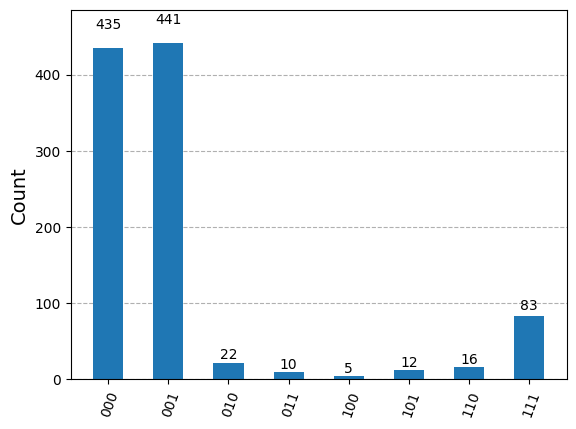

In [145]:
# Optional: perform measurement to find eigenvalues

# Measure the ancilla qubits to extract phase information
qc.measure(range(num_ancilla), range(num_ancilla))

# Simulate the circuit using the Aer simulator
simulator = AerSimulator()
job = simulator.run(transpile(qc, simulator), shots=1024)
result = job.result()

# Print the measurement results
counts = result.get_counts(qc)
print(f"Measurement results: {counts}")

# Plot the histogram
plot_histogram(counts)

In [146]:
#Convert measured outcomes to phases and then to eigenvalues
for measurement, count in counts.items():
    # Convert binary measurement to phase
    phase = sum(int(bit) * (1 / (2 ** (index + 1))) for index, bit in enumerate(reversed(measurement)))
    eigenvalue_estimate = 2 * np.pi * phase  # Scale to [0, 2π]

    # Since U = e^(i*λ), we can recover λ
    eigenvalue = np.angle(np.exp(1j * eigenvalue_estimate))

    print(f"Measured: {measurement}, Phase: {phase:.3f}, Eigenvalue estimate: {eigenvalue:.3f}")


Measured: 100, Phase: 0.125, Eigenvalue estimate: 0.785
Measured: 101, Phase: 0.625, Eigenvalue estimate: -2.356
Measured: 110, Phase: 0.375, Eigenvalue estimate: 2.356
Measured: 011, Phase: 0.750, Eigenvalue estimate: -1.571
Measured: 111, Phase: 0.875, Eigenvalue estimate: -0.785
Measured: 010, Phase: 0.250, Eigenvalue estimate: 1.571
Measured: 000, Phase: 0.000, Eigenvalue estimate: 0.000
Measured: 001, Phase: 0.500, Eigenvalue estimate: 3.142


### 3. Controlled Rotation
Implement the controlled rotation in Qiskit based on the eigenvalues obtained from QPE.

In [151]:
#########################################################################
eigenvalues = [-1, 3] # should be extracted out of the measurement result
#########################################################################

def controlled_rotations(qc, eigenvalues, num_ancilla):
    target_qubit = num_ancilla
    for idx, eigenvalue in enumerate(eigenvalues):
        if eigenvalue != 0:
            angle = 2 * np.pi / eigenvalue  # Convert eigenvalue to angle for rotation
            qc.crz(angle, idx, target_qubit)  # Apply controlled rotation (controlled RZ)
    return qc


qc = controlled_rotations(qc, eigenvalues, num_ancilla=num_ancilla)
qc.draw()


┌───┐                                        ┌───────┐           »
q_0: ───────┤ H ├────────────■───────────────────────────┤0      ├─────■─────»
            ├───┤            │                           │       │     │     »
q_1: ───────┤ H ├────────────┼──────────■────────────────┤1 IQFT ├─────┼─────»
            ├───┤            │          │                │       │     │     »
q_2: ───────┤ H ├────────────┼──────────┼──────────■─────┤2      ├─────┼─────»
     ┌──────┴───┴──────┐┌────┴────┐┌────┴────┐┌────┴────┐└───────┘┌────┴────┐»
q_3: ┤ Initialize(1,0) ├┤ Unitary ├┤ Unitary ├┤ Unitary ├─────────┤ Rz(-2π) ├»
     └─────────────────┘└─────────┘└─────────┘└─────────┘         └─────────┘»
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                 
«q_0: ────────────
«                 
«q_1: ─────■──────
«          │      
«q_2: ─────┼──────
«     ┌────┴─────┐
«q_3: ┤ Rz(2π/3) ├
«     └──────────┘
«c: 3/════════════
«

### 4. Inverse QPE and Measurement
Implement the inverse QPE and measure the qubits to extract the result.

In [152]:
def inverse_quantum_phase_estimation(A, num_ancilla=3):

    # Step 1: Apply Quantum Fourier Transform (QFT) to the ancilla qubits
    qc.append(QFT(num_ancilla, inverse=False).to_gate(), range(num_ancilla))

    # Step 2: Apply inverse of controlled unitary operations
    U = hermitian_to_unitary(A)
    for qubit in reversed(range(num_ancilla)):
        exponent = 2 ** qubit
        controlled_unitary_dagger = UnitaryGate(np.linalg.matrix_power(U, exponent).conj().T).control()  # Controlled U^(2^exponent) dagger
        qc.append(controlled_unitary_dagger, [qubit, num_ancilla])

    # Step 3: Apply Hadamard gates to the ancilla qubits
    qc.h(range(num_ancilla))

    return qc

qc = inverse_quantum_phase_estimation(A, num_ancilla=num_ancilla)
qc.draw()

┌───┐                                        ┌───────┐           »
q_0: ───────┤ H ├────────────■───────────────────────────┤0      ├─────■─────»
            ├───┤            │                           │       │     │     »
q_1: ───────┤ H ├────────────┼──────────■────────────────┤1 IQFT ├─────┼─────»
            ├───┤            │          │                │       │     │     »
q_2: ───────┤ H ├────────────┼──────────┼──────────■─────┤2      ├─────┼─────»
     ┌──────┴───┴──────┐┌────┴────┐┌────┴────┐┌────┴────┐└───────┘┌────┴────┐»
q_3: ┤ Initialize(1,0) ├┤ Unitary ├┤ Unitary ├┤ Unitary ├─────────┤ Rz(-2π) ├»
     └─────────────────┘└─────────┘└─────────┘└─────────┘         └─────────┘»
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                 ┌──────┐                                      ┌───┐
«q_0: ────────────┤0     ├────────────────────────────────■─────┤ H ├
«                 │      │                      ┌───┐     │     └───┘
«q_1: ─────■──────┤1 QFT ├────────────────■─────┤ H ├─────┼──────────
«          │      │      │                │     ├───┤     │          
«q_2: ─────┼──────┤2     ├─────■──────────┼─────┤ H ├─────┼──────────
«     ┌────┴─────┐└──────┘┌────┴────┐┌────┴────┐└───┘┌────┴────┐     
«q_3: ┤ Rz(2π/3) ├────────┤ Unitary ├┤ Unitary ├─────┤ Unitary ├─────
«     └──────────┘        └─────────┘└─────────┘     └─────────┘     
«c: 3/═══════════════════════════════════════════════════════════════
«

Measurement results: {'101': 2, '011': 8, '110': 26, '100': 390, '010': 40, '000': 558}


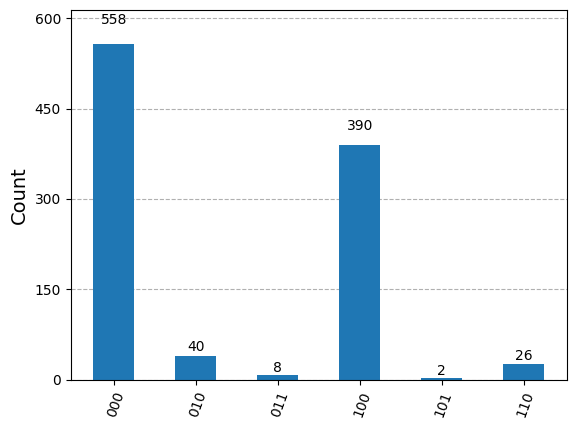

In [141]:
#Optional: Perform measurement to find solution vector

# Measure the ancilla qubits to extract output states
qc.measure(range(num_ancilla), range(num_ancilla))

# Simulate the circuit using the Aer simulator
simulator = AerSimulator()
job = simulator.run(transpile(qc, simulator), shots=1024)
result = job.result()

# Print the measurement results
counts = result.get_counts(qc)
print(f"Measurement results: {counts}")

# Plot the histogram
plot_histogram(counts)

## Part 2: Analyze and Compare Results
Now that you’ve implemented the HHL algorithm, it's time to compare the quantum solution with the classical one.

### Classical Solution

Solve the system $Ax=b$ using classical methods (e.g., numpy's linear algebra solver).

In [88]:
# Compute eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eigh(A)
print("Eigenvalues of A:", eigenvalues)
print("Eigenvectors of A:\n", eigenvectors)

# Calculate the min and max eigenvalues of the matrix A
min_eigenvalue = np.min(eigenvalues)
max_eigenvalue = np.max(eigenvalues)
print("Max eigenvalue of A:", max_eigenvalue)
print("Min eigenvalue of A:", min_eigenvalue)


Eigenvalues of A: [-1.  3.]
Eigenvectors of A:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Max eigenvalue of A: 3.0
Min eigenvalue of A: -1.0


In [89]:
# Solve for x in the equation Ax = b
x = np.linalg.solve(A, b)
print("Solution x = \n", x)

Solution x = 
 [-0.33333333  0.66666667]


### Quantum Solution

Run your quantum circuit in Qiskit and extract the result from the measurement.

### Comparison
Compare the quantum result with the classical result. How accurate is the quantum solution? What challenges did you face in implementing the HHL algorithm?

# Playground

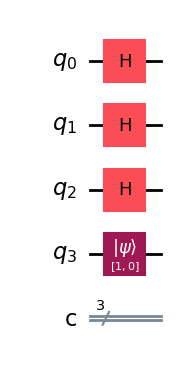

In [81]:
# Define the vector b
b = np.array([1, 0])

# Initialize the quantum state based on b
qc_b = QuantumCircuit(1)
qc_b.initialize([b[0], b[1]], 0, normalize=True)

# Number of ancilla qubits
num_ancillae = 3

# Total qubits: ancilla + target
total_qubits = num_ancillae + 1 # Target is a two-dimensional vector, hence only 1 qubit required

# Create a quantum circuit with ancilla and target qubits
qc = QuantumCircuit(total_qubits, num_ancillae)

# Add the b_circuit to the new circuit
qc.compose(qc_b, qubits=num_ancillae, inplace=True)

# Initialize the target qubit in one of the eigenstates of A
# For eigenvalue 3: |+> = (|0> + |1>)/sqrt(2) --> apply h gate
# For eigenvalue -1: |-> = (|0> - |1>)/sqrt(2) --> apply x, h and x gate
#qc.x(num_ancillae) # only for eigenvalue -1
#qc.h(num_ancillae)
#qc.x(num_ancillae) # only for eigenvalue -1

# Apply Hadamard gates to all ancilla qubits
qc.h(range(num_ancillae))

# Visualize the quantum circuit
qc.draw('mpl')

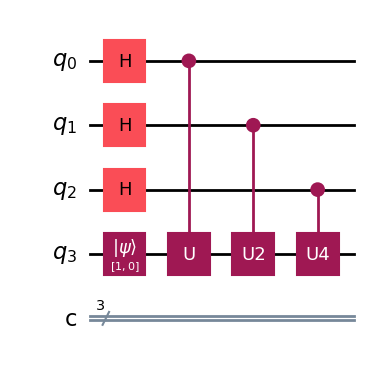

In [85]:
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit.circuit.library import UnitaryGate

# Create Unitary Gates for U, U^2, U^4
t = 1 / 5
U_gate = UnitaryGate(U, label='U')
U2 = expm(1j * A * t * 2)  # U^2 = exp(i*A*t*2)
U2_gate = UnitaryGate(U2, label='U2')
U4 = expm(1j * A * t * 4)  # U^4 = exp(i*A*t*4)
U4_gate = UnitaryGate(U4, label='U4')

# Add controlled-U gates
qc.append(U_gate.control(), [0, num_ancillae])
qc.append(U2_gate.control(), [1, num_ancillae])
qc.append(U4_gate.control(), [2, num_ancillae])

# Visualize the quantum circuit
qc.draw('mpl')

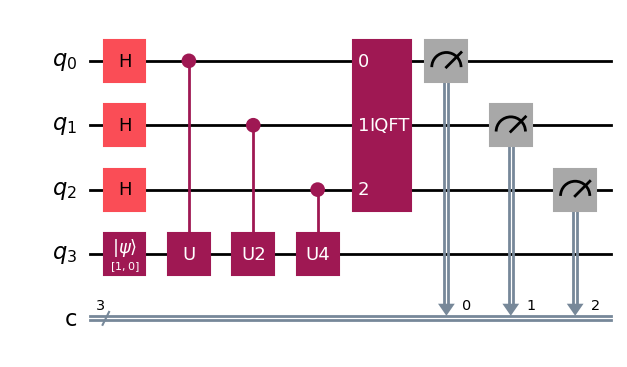

In [86]:
# Apply inverse QFT to ancilla qubits
qc.append(QFT(num_ancillae, inverse=True).to_gate(), range(num_ancillae))

# Measure ancilla qubits
qc.measure(range(num_ancillae), range(num_ancillae))

# Draw the quantum circuit
qc.draw('mpl')

Measurement Results: {'100': 7, '110': 16, '101': 10, '011': 12, '111': 67, '001': 450, '010': 24, '000': 438}
Eigenvalue Estimates:
Eigenvalue: 1.0000, Frequency: 7
Eigenvalue: 2.0000, Frequency: 16
Eigenvalue: 1.5000, Frequency: 10
Eigenvalue: 0.5000, Frequency: 12
Eigenvalue: 2.5000, Frequency: 67
Eigenvalue: -0.5000, Frequency: 450
Eigenvalue: 0.0000, Frequency: 24
Eigenvalue: -1.0000, Frequency: 438


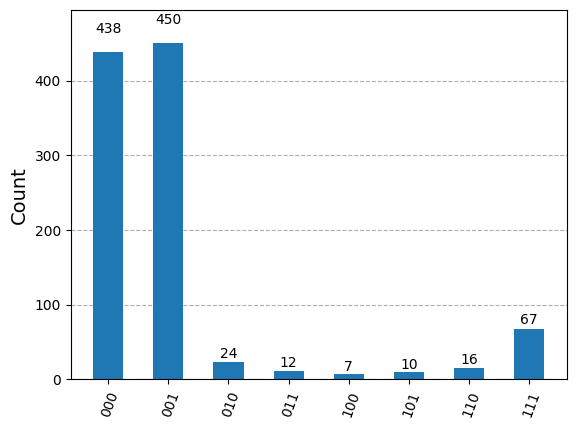

In [90]:
# Execute the circuit with a number of shots
shots = 1024
job = simulator.run(transpile(qc, simulator), shots=shots)

# Get the results
result = job.result()
counts = result.get_counts(qc)

print("Measurement Results:", counts)


# Calculate eigenvalues from measurement results
eigenvalue_estimates = {}
for bitstring, count in counts.items():
    # Convert bitstring to decimal
    m = int(bitstring, 2)
    # Calculate eigenvalue estimate
    eigenvalue_estimate = (m / (2 ** num_ancillae)) * (max_eigenvalue - min_eigenvalue) + min_eigenvalue
    eigenvalue_estimates[eigenvalue_estimate] = count

# Display the eigenvalue estimates with their frequencies
print("Eigenvalue Estimates:")
for eigenvalue, freq in eigenvalue_estimates.items():
    print(f"Eigenvalue: {eigenvalue:.4f}, Frequency: {freq}")

# Plot the histogram
plot_histogram(counts)

The measurement results show the eigenvalues but not the solution vector x.
That's why in the following we try to extract the statevector directly instead of performing a measurement.
Ideally, x can be calculated out of the statevector

In [91]:
# Put it all in one function to plot the result based in the max number of ancillae qubits

def HHL(A, b, max_num_ancillae=3):

    # Check if A is hermitian, otherwise build hermitian matrix H out of A
    if ishermitian(A):
        H = A
        #print("A is hermitian.")
    else:
        H = np.vstack([np.hstack([np.zeros((2,2)), np.conj(A).T]), np.hstack([A, np.zeros((2,2))])])
        print("A is not hermitian.")
        print('Hermitian Matrix H = \n', H)

    # Compute eigenvalues and eigenvectors of H
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    min_eigenvalue = np.min(eigenvalues)
    max_eigenvalue = np.max(eigenvalues)

    # Compute the unitary operator U = exp(i*H*t) out of hermitian matrix
    t = 1 / (max_eigenvalue * 5) # Scaling factor to ensure phases are within [0,1) and distinct
    U = expm(1j * H * t)
    #print('Unitary Matrix U = \n', U)

    # Verify that U is unitary
    identity = np.eye(len(H))
    if not np.allclose(U.conj().T @ U, identity):
        print("U is not unitary.")

    # Prepare to store the solution vector
    solution_vectors = []

    # Loop over increasing num_ancillae
    for num_ancillae in range(1, max_num_ancillae + 1):

        # Normalize b
        b_normalized = b / np.linalg.norm(b)

        # Initialize the quantum circuit with 1 qubit in |0> state representing the vector b
        qc = QuantumCircuit(num_ancillae + 1, num_ancillae) # 1 qubit for b

        # Initialize the quantum state based on b
        qc.initialize([b_normalized[0], b_normalized[1]], num_ancillae)

        # Apply Hadamard gates to all ancilla qubits
        qc.h(range(num_ancillae))

        # Apply controlled-U operations based on eigenvalues
        for i in range(num_ancillae):
            angle = -2 * np.pi * (eigenvalues[i % len(eigenvalues)] * t)
            qc.crz(angle, i, num_ancillae)  # Controlled rotation based on eigenvalue
        #for qubit in range(num_ancillae):
        #    qc.append(UnitaryGate(U, label="A^2^" + str(qubit)).control(), [qubit, num_ancillae])

        # Apply inverse QFT to ancilla qubits
        qc.append(QFT(num_ancillae, inverse=True).to_gate(), range(num_ancillae))

        # Measure ancilla qubits
        #qc.measure(range(num_ancillae), range(num_ancillae))


        # Save the statevectors
        qc.save_statevector()

        # Run simulator
        job = simulator.run(transpile(qc, simulator))
        result = job.result()

        # Retrieve the statevector
        statevector = result.get_statevector(qc)

        # Extract the relevant part of the statevector
        # For each configuration of the ancilla qubits, the last qubit encodes the solution
        # We need to consider all combinations of ancilla states
        x_solution = np.zeros(2, dtype=complex)

        for i in range(2 ** num_ancillae):
            # Create a binary representation of the ancilla state
            ancilla_state = f"{i:0{num_ancillae}b}"  # Create a binary string of length num_ancillae
            index_0 = int(ancilla_state + '0', 2)  # Last qubit is |0>
            x_solution[0] += statevector[index_0]  # Amplitude for |0> in the last qubit
            index_1 = int(ancilla_state + '1', 2)  # Last qubit is |1>
            x_solution[1] += statevector[index_1]  # Amplitude for |1> in the last qubit


        # Normalize the solution vector
        x_solution /= np.linalg.norm(x_solution)

        # Append the solution vector for this number of ancillae
        solution_vectors.append(x_solution)

    # Display the solution vectors
    for i, sol_vec in enumerate(solution_vectors):
        print(f"Approximated solution for {i+1} ancillae qubits: x = [{sol_vec[0].real:.4f}, {sol_vec[1].real:.4f}]")


    return solution_vectors


In [92]:
solution_vectors = HHL(A, b, max_num_ancillae=10)

Approximated solution for 1 ancillae qubits: x = [0.9891, 0.0109]
Approximated solution for 2 ancillae qubits: x = [0.9045, 0.0955]
Approximated solution for 3 ancillae qubits: x = [0.9891, 0.0109]
Approximated solution for 4 ancillae qubits: x = [0.9045, 0.0955]
Approximated solution for 5 ancillae qubits: x = [0.9891, 0.0109]
Approximated solution for 6 ancillae qubits: x = [0.9045, 0.0955]
Approximated solution for 7 ancillae qubits: x = [0.9891, 0.0109]
Approximated solution for 8 ancillae qubits: x = [0.9045, 0.0955]
Approximated solution for 9 ancillae qubits: x = [0.9891, 0.0109]
Approximated solution for 10 ancillae qubits: x = [0.9045, 0.0955]


In [93]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from scipy.linalg import expm
from qiskit_aer import AerSimulator

# Define helper function to check for Hermitian matrix
def ishermitian(matrix):
    """Check if a matrix is Hermitian."""
    return np.allclose(matrix, np.conj(matrix.T))

# Function to implement HHL
def HHL(A, b, max_num_ancillae=3):

    # Check if A is hermitian
    if not ishermitian(A):
        raise ValueError("Matrix A must be Hermitian.")

    # Compute the eigenvalues and eigenvectors of A
    eigenvalues, eigenvectors = np.linalg.eigh(A)
    min_eigenvalue = np.min(eigenvalues)
    max_eigenvalue = np.max(eigenvalues)

    # Prepare to store solution vectors
    solution_vectors = []

    # Initialize the simulator
    simulator = AerSimulator()

    # Loop over increasing num_ancillae
    for num_ancillae in range(1, max_num_ancillae + 1):

        # Normalize b
        b_normalized = b / np.linalg.norm(b)

        # Initialize the quantum circuit with num_ancillae qubits for ancilla and 1 qubit for b
        qc = QuantumCircuit(num_ancillae + 1, num_ancillae)  # 1 qubit for b

        # Initialize the quantum state based on b in the last qubit
        qc.initialize([b_normalized[0], b_normalized[1]], num_ancillae)

        # Apply Hadamard gates to all ancilla qubits
        qc.h(range(num_ancillae))

        # Apply controlled rotations based on eigenvalues
        for i in range(num_ancillae):
            if i < len(eigenvalues):  # Ensure we don't exceed the number of eigenvalues
                angle = 2 * np.pi * (eigenvalues[i % len(eigenvalues)] / max_eigenvalue)
                qc.crz(angle, i, num_ancillae)  # Controlled rotation based on eigenvalue

        # Apply inverse QFT to ancilla qubits
        qc.append(QFT(num_ancillae, inverse=True).to_gate(), range(num_ancillae))

        # Save the statevector
        qc.save_statevector()

        # Run the simulator
        job = simulator.run(transpile(qc, simulator))
        result = job.result()

        # Retrieve the statevector
        statevector = result.get_statevector(qc)

        # Extract the relevant part of the statevector
        # Prepare to extract solution coefficients
        x_solution = np.zeros(2, dtype=complex)  # Initialize complex solution vector

        for i in range(2 ** num_ancillae):
            # Create a binary representation of the ancilla state
            ancilla_state = f"{i:0{num_ancillae}b}"  # Create binary string of length num_ancillae

            # Retrieve the coefficients for |0> and |1> states of the last qubit
            index_0 = int(ancilla_state + '0', 2)  # Last qubit is |0>
            x_solution[0] += statevector[index_0]  # Amplitude for |0>

            index_1 = int(ancilla_state + '1', 2)  # Last qubit is |1>
            x_solution[1] += statevector[index_1]  # Amplitude for |1>

        # Normalize the solution vector
        print(x_solution)
        #x_solution = np.abs(x_solution)
        print(x_solution)
        x_solution /= np.linalg.norm(x_solution)
        print(x_solution)

        # Append the solution vector for this number of ancillae
        solution_vectors.append(x_solution)

    # Display the solution vectors
    for i, sol_vec in enumerate(solution_vectors):
        print(f"Approximated solution for {i+1} ancillae qubits: x = [{sol_vec[0].real:.4f}, {sol_vec[1].real:.4f}]")

    return solution_vectors

# Define matrix A and vector b
A = np.array([[1, 2], [2, 1]])  # Matrix A
b = np.array([1, 0])  # Vector b

# Run HHL to get solution vectors
solution_vectors = HHL(A, b, max_num_ancillae=3)


[0.75+0.4330127j 0.25-0.4330127j]
[0.75+0.4330127j 0.25-0.4330127j]
[0.75+0.4330127j 0.25-0.4330127j]
[1.57009246e-16-1.23259516e-32j 1.00000000e+00+5.55111512e-17j]
[1.57009246e-16-1.23259516e-32j 1.00000000e+00+5.55111512e-17j]
[1.57009246e-16-1.23259516e-32j 1.00000000e+00+5.55111512e-17j]
[1.00000000e+00-5.55111512e-17j 1.23259516e-32+6.12323400e-17j]
[1.00000000e+00-5.55111512e-17j 1.23259516e-32+6.12323400e-17j]
[1.00000000e+00-5.55111512e-17j 1.23259516e-32+6.12323400e-17j]
Approximated solution for 1 ancillae qubits: x = [0.7500, 0.2500]
Approximated solution for 2 ancillae qubits: x = [0.0000, 1.0000]
Approximated solution for 3 ancillae qubits: x = [1.0000, 0.0000]


Measurement Results: {'1010': 14, '0110': 6, '1101': 6, '1100': 165, '0101': 6, '1110': 39, '1111': 5, '0001': 19, '0100': 184, '0010': 105, '0000': 475}


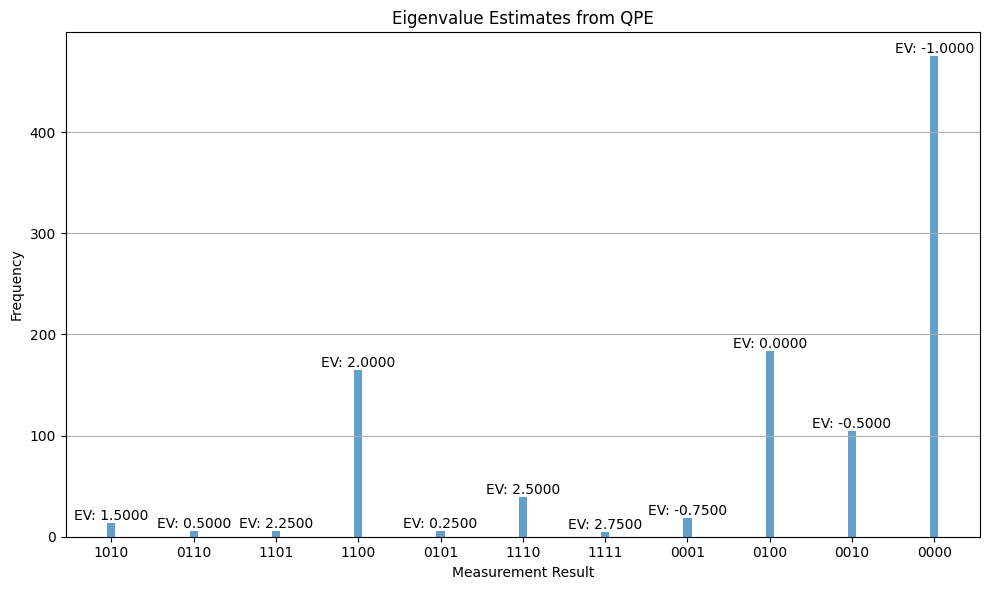

In [64]:
HHL(A, b, num_ancillae=4)

Measurement Results: {'01101': 1, '01011': 1, '11111': 1, '00110': 3, '00011': 1, '01110': 1, '11101': 17, '00100': 148, '00000': 462, '00010': 95, '10101': 3, '11100': 150, '00001': 26, '10010': 2, '01100': 31, '11110': 35, '01010': 5, '11010': 13, '01001': 1, '00101': 8, '10100': 20}


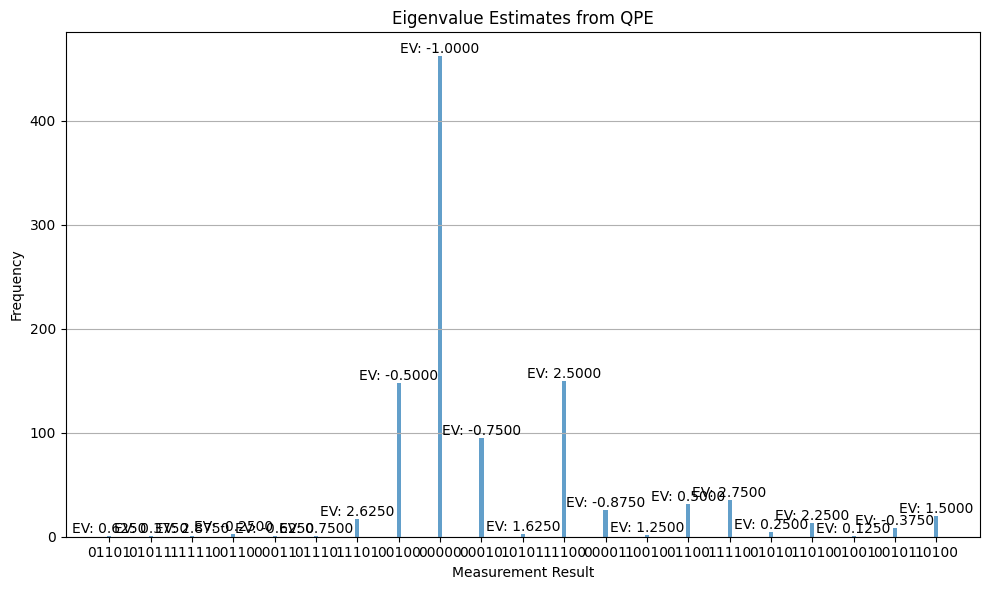

In [65]:
HHL(A, b, num_ancillae=5)